In [147]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [148]:
titanic_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
# get rid of unnecessary columns
titanic_df, test_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1), test_df.drop(['Name', 'Ticket'], axis = 1)


In [76]:
titanic_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [77]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [79]:
emb = list(titanic_df["Embarked"])
d = {k:0 for k in set(emb)}
for e in emb:
    d[e]+=1
most_common = max(d.keys())
titanic_df["Embarked"] = titanic_df["Embarked"].fillna(most_common) #fill two missing values with most common data

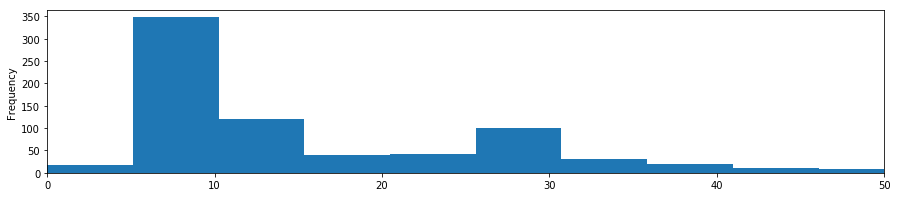

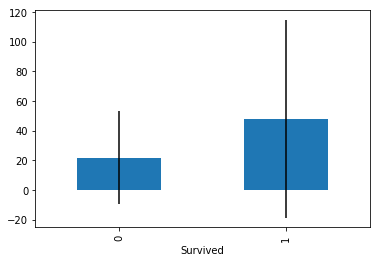

In [80]:
# fill in test_df missing values
test_df["Fare"].fillna(test_df['Fare'].median(), inplace = True)
# convert frm float to int
titanic_df["Fare"] = titanic_df["Fare"].astype(int)
test_df["Fare"] = test_df["Fare"].astype(int)
# plot survived and not survived fares
fares_split = [titanic_df["Fare"][titanic_df["Survived"] == i] for i in range(2)]
fares_ns, fares_s = fares_split[0], fares_split[1]

average_fare, stdev_fare = DataFrame([fares_ns.mean(), fares_s.mean()]), DataFrame([fares_ns.std(), fares_s.std()])
# plot
titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

average_fare.index.names = stdev_fare.index.names = ["Survived"]
average_fare.plot(yerr=stdev_fare,kind='bar',legend=False)

In [143]:
# ML
# convert male and female 
'male' in set(titanic_df['Sex'])
li = filter(lambda x: x == 'female', titanic_df['Sex'])
len(li)
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Sex'] = map(lambda x: 1 if x == 'male' else 0, titanic_df['Sex'])
X_train, y_train = titanic_df.drop("Survived", axis = 1), titanic_df["Survived"]
X_test = test_df.drop("PassengerId", axis = 1).copy()
# logistic_regression = LogisticRegression()
# logistic_regression.fit(X_train, y_train)
# y_pred = logistic_regression.predict(X_test)
X_train, y_train = titanic_df.drop("Survived", axis = 1), titanic_df["Survived"]
X_test = test_df.drop("PassengerId", axis = 1).copy()
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
X_test = X_test.drop(['Embarked', 'Cabin'], axis = 1)
X_test['Sex'] = map(lambda x: 1 if x == 'male' else 0, X_test['Sex'])
X_test['Age'] = X_test.fillna(X_test['Age'].median())
y_pred = logistic_regression.predict(X_test)
logistic_regression.score(X_train, y_train)

0.70258136924803594

In [153]:
# random forests
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.91582491582491588

In [154]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)

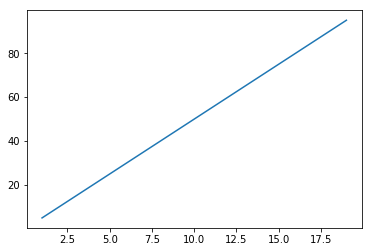

In [152]:
x = np.arange(1,20)
y = np.arange(1,20) * 5
plt.plot(x,y)